challenge#5 python analysis

# Task 1 CNN code example

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # mean and std of MNIST
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        images, labels = batch
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")



Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Epoch 1/5, Loss: 156.6584
Epoch 2/5, Loss: 45.4196
Epoch 3/5, Loss: 33.1115
Epoch 4/5, Loss: 24.6219
Epoch 5/5, Loss: 18.0437
Test Accuracy: 98.91%


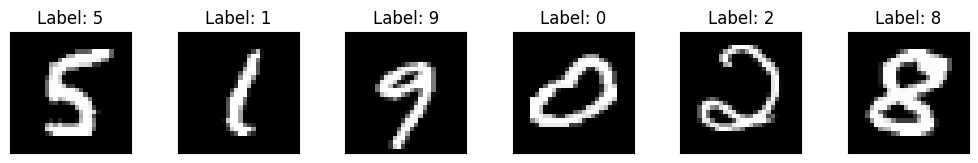

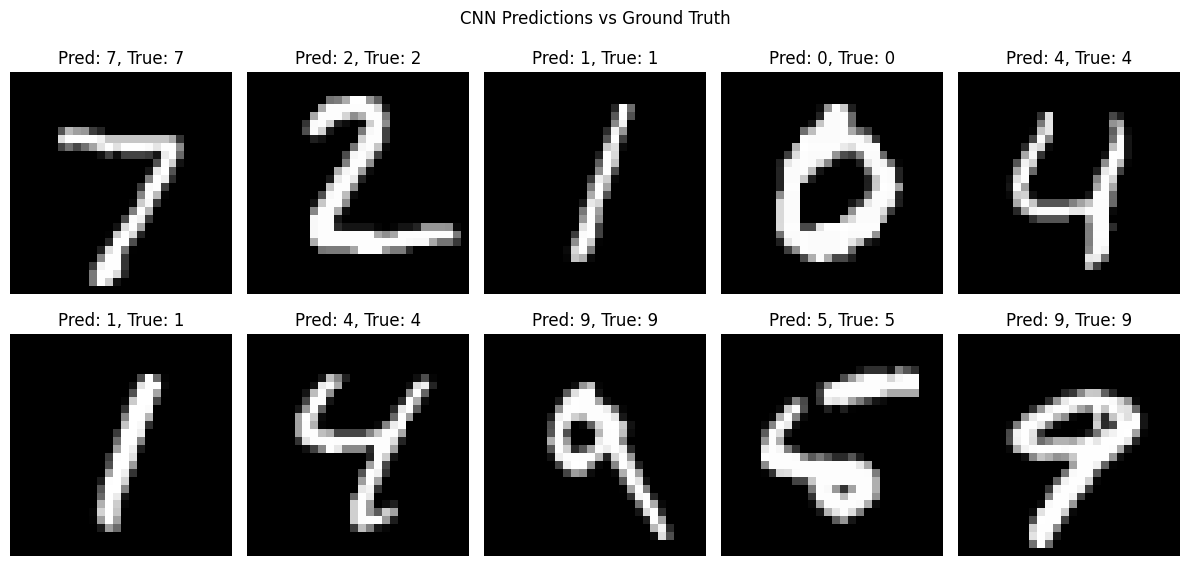

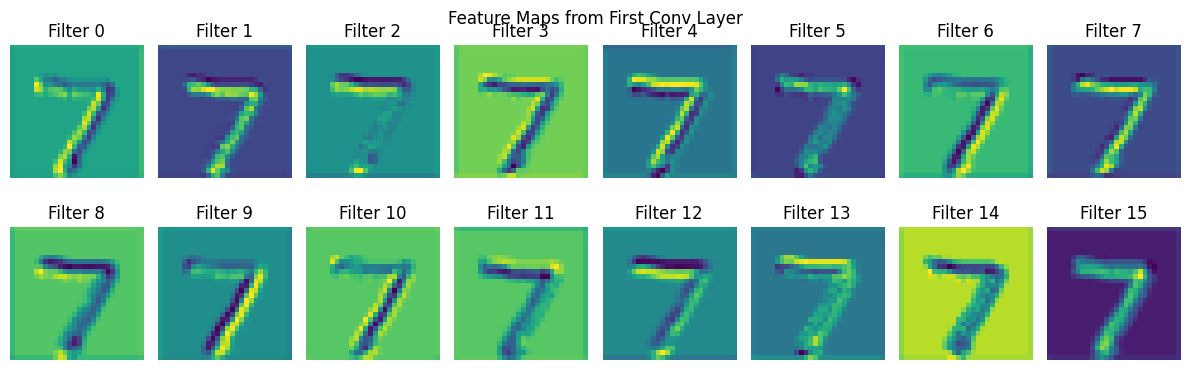

In [3]:
# Show a few training samples
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title(f"Label: {example_targets[i]}")
    plt.xticks([])
    plt.yticks([])

model.eval()
images, labels = next(iter(test_loader))
outputs = model(images)
_, preds = torch.max(outputs, 1)

fig = plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f"Pred: {preds[i].item()}, True: {labels[i].item()}")
    plt.axis('off')
plt.suptitle('CNN Predictions vs Ground Truth')
plt.tight_layout()

def visualize_feature_maps(model, image):
    model.eval()
    with torch.no_grad():
        # Expand to match batch size
        x = image.unsqueeze(0)  # Add batch dimension
        feature_maps = model.conv_layer[0](x)  # First Conv layer

    fig, axes = plt.subplots(2, 8, figsize=(12, 4))
    for i, ax in enumerate(axes.flat):
        ax.imshow(feature_maps[0, i].detach().numpy(), cmap='viridis')
        ax.set_title(f"Filter {i}")
        ax.axis('off')
    plt.tight_layout()
    plt.suptitle("Feature Maps from First Conv Layer")

# Choose one test image
img = test_dataset[0][0]  # shape [1, 28, 28]
visualize_feature_maps(model, img)


In [ ]:
import py_compile

py_compile.compile("cnn.py")


'__pycache__\\cnn.cpython-310.pyc'

In [8]:
import dis
import marshal

with open('__pycache__/cnn.cpython-310.pyc', 'rb') as f:
    f.read(16)  # skip the .pyc header (magic number, timestamp, etc.)
    code = marshal.load(f)

dis.dis(code)


  1           0 LOAD_CONST               0 (0)
              2 LOAD_CONST               1 (None)
              4 IMPORT_NAME              0 (torch)
              6 STORE_NAME               0 (torch)

  2           8 LOAD_CONST               0 (0)
             10 LOAD_CONST               1 (None)
             12 IMPORT_NAME              1 (torch.nn)
             14 IMPORT_FROM              2 (nn)
             16 STORE_NAME               2 (nn)
             18 POP_TOP

  3          20 LOAD_CONST               0 (0)
             22 LOAD_CONST               1 (None)
             24 IMPORT_NAME              3 (torch.optim)
             26 IMPORT_FROM              4 (optim)
             28 STORE_NAME               4 (optim)
             30 POP_TOP

  4          32 LOAD_CONST               0 (0)
             34 LOAD_CONST               2 (('datasets', 'transforms'))
             36 IMPORT_NAME              5 (torchvision)
             38 IMPORT_FROM              6 (datasets)
             40 S

In [9]:
import collections
# Count instructions
counter = collections.Counter()
for instr in dis.get_instructions(code):
    counter[instr.opname] += 1

# Print results
for opname, count in counter.most_common():
    print(f"{opname:20s}: {count}")

LOAD_CONST          : 17
STORE_NAME          : 8
IMPORT_NAME         : 6
IMPORT_FROM         : 6
POP_TOP             : 6
LOAD_NAME           : 2
RETURN_VALUE        : 2
MAKE_FUNCTION       : 1
COMPARE_OP          : 1
POP_JUMP_IF_FALSE   : 1
CALL_FUNCTION       : 1


In [6]:
import subprocess
import sys

subprocess.check_call([sys.executable, "-m", "pip", "install", "snakeviz"])


0

Epoch 1/5, Loss: 160.0817
Epoch 2/5, Loss: 44.1757
Epoch 3/5, Loss: 31.6038
Epoch 4/5, Loss: 23.2826
Epoch 5/5, Loss: 19.2122
Test Accuracy: 98.94%


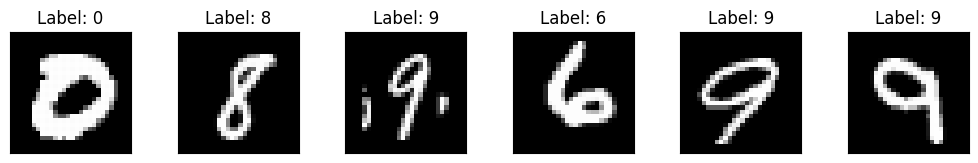

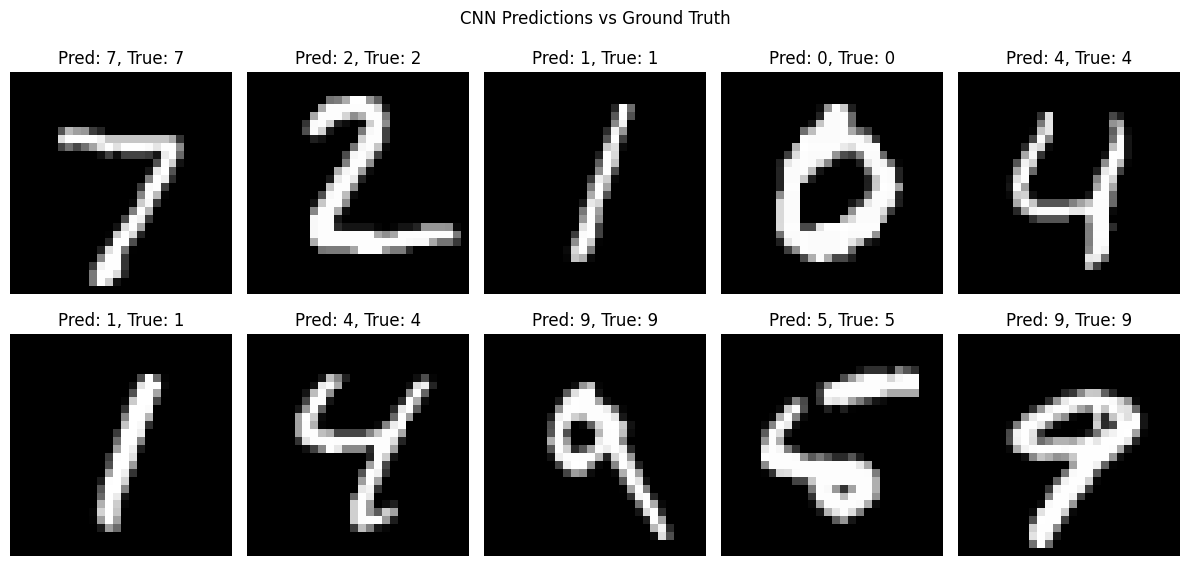

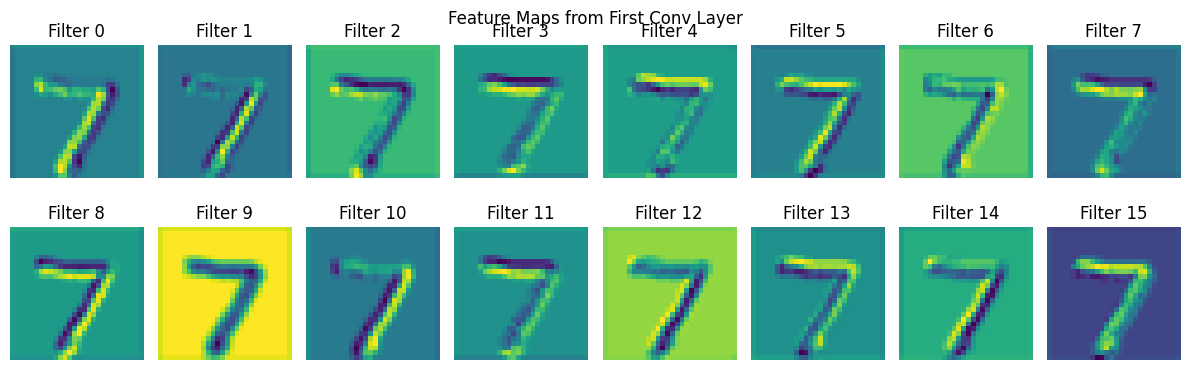

In [ ]:
# profile_cnn.py
import cProfile
import cnn  # assuming cnn.py defines a main or train function

# Run profiling and save results to 'profile_output.prof'
cProfile.run('cnn.main()', filename='profile_output.prof')


In [ ]:
# Step 2: Launch Snakeviz using subprocess
subprocess.run(["snakeviz", "result/profile_output.prof"])


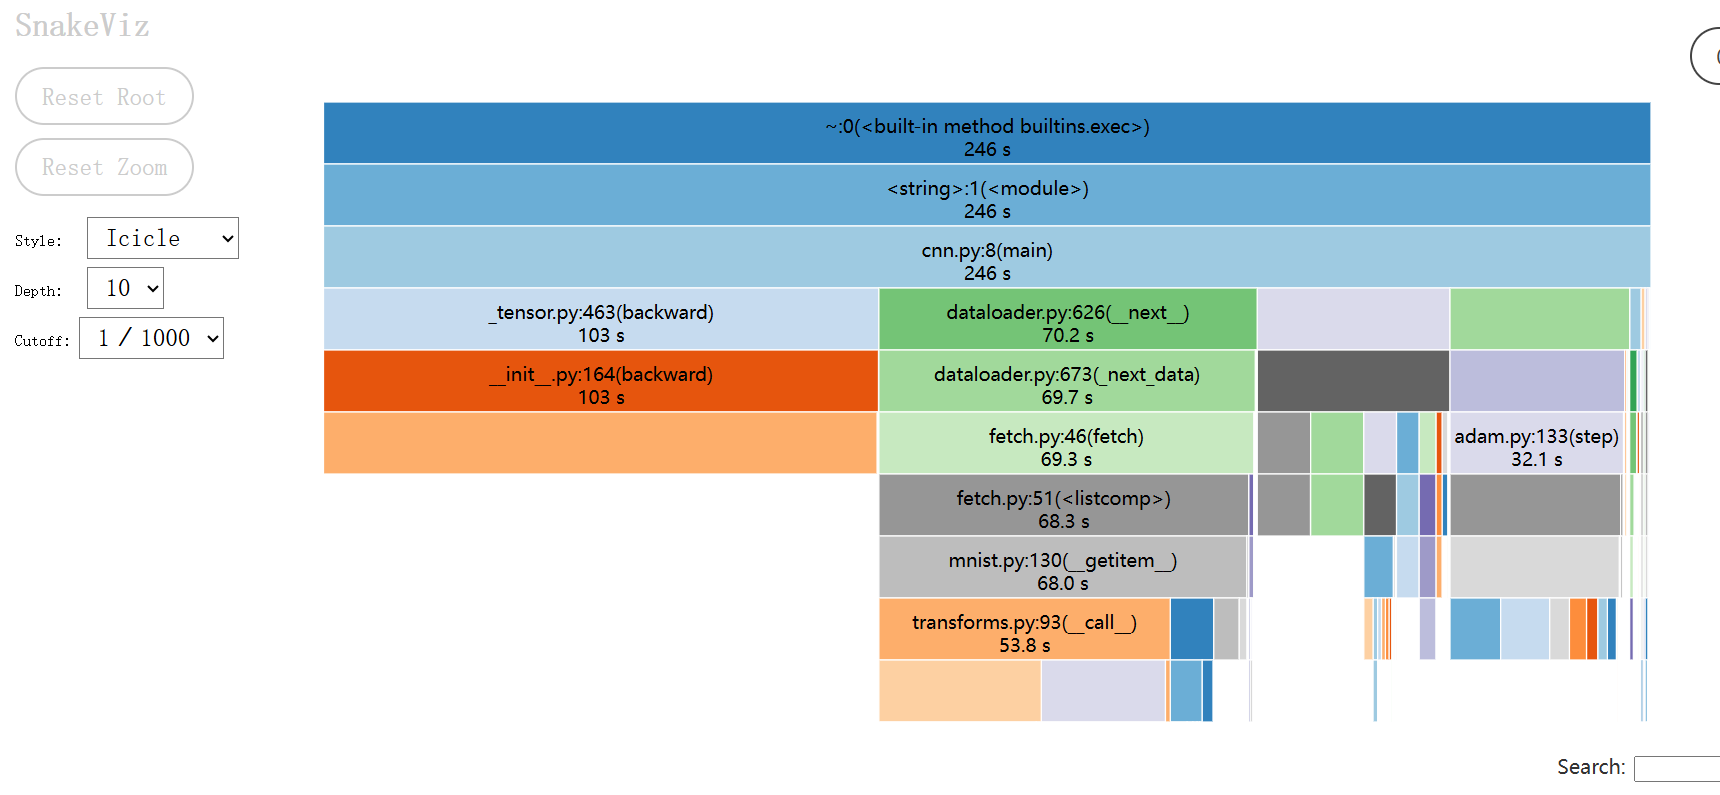

In [2]:
from IPython.display import Image

Image(filename="result/CNNtimer.png")

Epoch 1/5, Loss: 149.9629
Epoch 2/5, Loss: 46.6996
Epoch 3/5, Loss: 33.5015
Epoch 4/5, Loss: 24.0057
Epoch 5/5, Loss: 18.3592
Test Accuracy: 99.02%
         41269877 function calls (41108070 primitive calls) in 504.345 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       13    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:100(acquire)
     10/3    0.000    0.000    0.015    0.005 <frozen importlib._bootstrap>:1022(_find_and_load)
      3/1    0.000    0.000    0.012    0.012 <frozen importlib._bootstrap>:1038(_gcd_import)
    75/67    0.000    0.000    0.011    0.000 <frozen importlib._bootstrap>:1053(_handle_fromlist)
       13    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:125(release)
       10    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:165(__init__)
       10    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:169(__enter__)
       10    0.000   

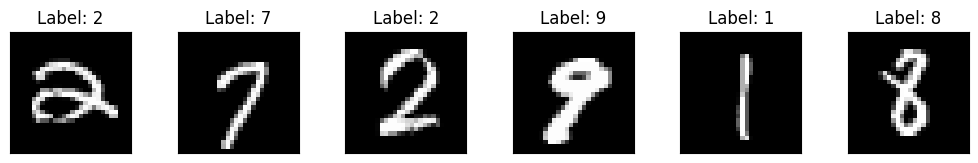

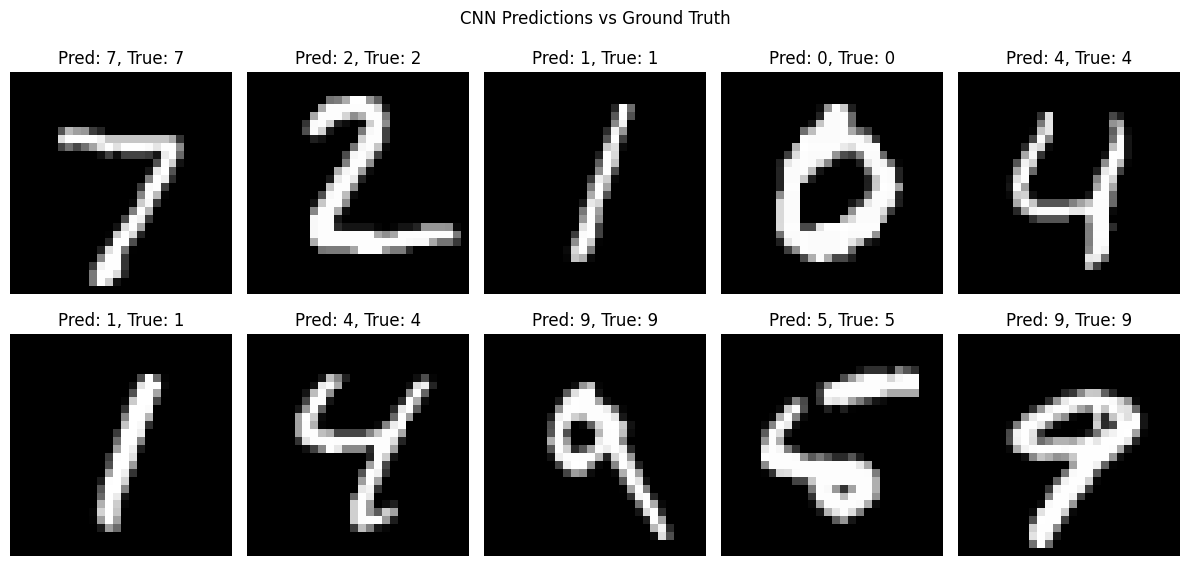

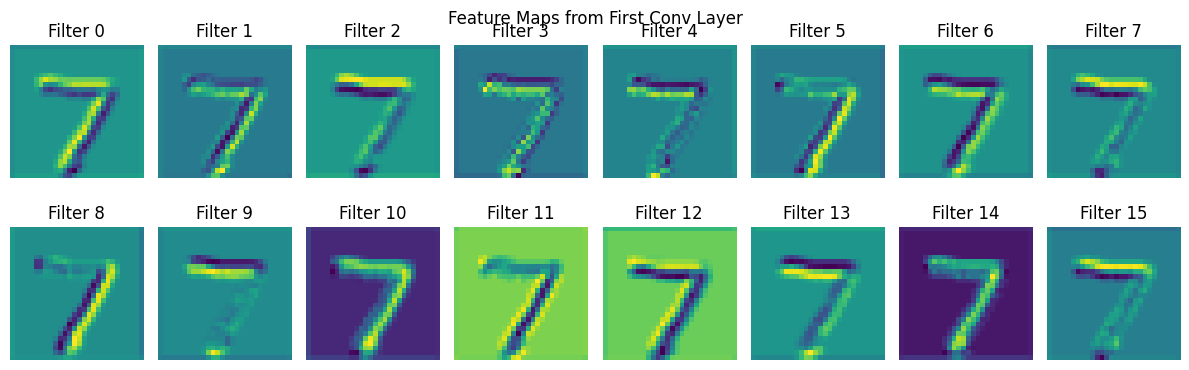

In [6]:
# also you can excute here
import cProfile
import cnn
cProfile.run('cnn.main()')

In [7]:
import ast
import inspect

def analyze_parallelism(source_code):
    print("🔍 Analyzing potential parallelism...\n")
    tree = ast.parse(source_code)

    for node in ast.walk(tree):
        # Look for outer training loop
        if isinstance(node, ast.For):
            if hasattr(node.iter, 'id') and node.iter.id == 'train_loader':
                print("🔁 Found training loop over batches (serial).")
                print("✅ Batches are independent → Can run in parallel.\n")

        # Look for function calls
        if isinstance(node, ast.Call):
            func_name = getattr(node.func, 'attr', getattr(node.func, 'id', 'unknown'))
            if func_name in ['zero_grad', 'forward', 'backward', 'step']:
                print(f"⚙️  Found '{func_name}()' → check for GPU acceleration or batching.\n")

    print("💡 Suggestion: Use DataLoader(num_workers=4+) for data loading parallelism.")
    print("💡 Suggestion: Use torch.nn.DataParallel or torchrun for multi-GPU scaling.\n")

# Get source of your main training script
import cnn  # replace with your script name
source_code = inspect.getsource(cnn.main)  # assumes everything is inside cnn.main()

# Run the analysis
analyze_parallelism(source_code)


🔍 Analyzing potential parallelism...

🔁 Found training loop over batches (serial).
✅ Batches are independent → Can run in parallel.

⚙️  Found 'zero_grad()' → check for GPU acceleration or batching.

⚙️  Found 'backward()' → check for GPU acceleration or batching.

⚙️  Found 'step()' → check for GPU acceleration or batching.

💡 Suggestion: Use DataLoader(num_workers=4+) for data loading parallelism.
💡 Suggestion: Use torch.nn.DataParallel or torchrun for multi-GPU scaling.



Line  1: READ set() | WRITE {'dis'}
Line  2: READ set() | WRITE {'marshal'}
Line  3: READ set() | WRITE {'types'}
Line  5: READ set() | WRITE {'PLOT_KEYWORDS'}
Line 10: READ set() | WRITE {'load_code'}
Line 11: READ {'marshal', 'f', 'open', 'pyc_path'} | WRITE {'f'}
Line 15: READ set() | WRITE {'extract_top_level_calls'}
Line 16: READ set() | WRITE set()
Line 17: READ {'dis', 'code_obj', 'list'} | WRITE {'instructions'}
Line 18: READ set() | WRITE {'blocks'}
Line 19: READ set() | WRITE {'current_block'}
Line 20: READ set() | WRITE {'in_call'}
Line 22: READ {'blocks', 'instructions', 'in_call', 'instr', 'current_block'} | WRITE {'instr', 'current_block', 'in_call'}
Line 34: READ {'i', 'blocks', 'any', 'b'} | WRITE {'i', 'b'}
Line 36: READ set() | WRITE {'analyze_block'}
Line 37: READ {'set'} | WRITE {'reads'}
Line 38: READ {'set'} | WRITE {'writes'}
Line 39: READ {'instr', 'block', 'writes', 'reads'} | WRITE {'instr'}
Line 44: READ {'writes', 'reads'} | WRITE set()
Line 46: READ set() |

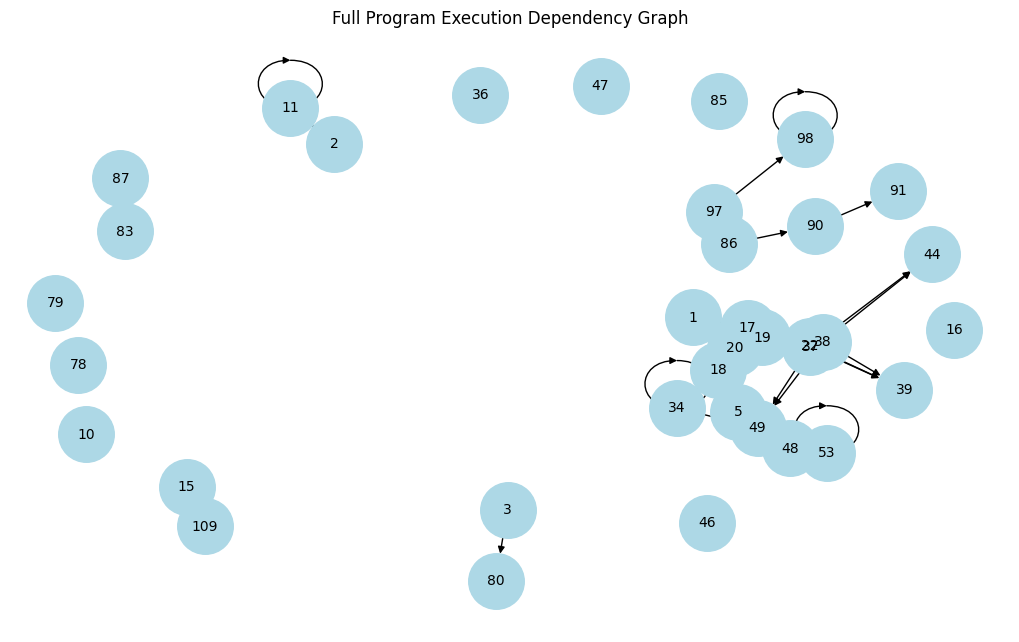


⚡ Potentially parallel lines: [10, 15, 16, 36, 46, 47, 78, 79, 83, 85, 87, 109]


In [5]:
import ast
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

class GlobalExecutionAnalyzer(ast.NodeVisitor):
    def __init__(self):
        self.reads = defaultdict(set)
        self.writes = defaultdict(set)
        self.dependencies = []
        self.symbol_table = {}
        self.line_order = []
        self.current_line = None

    def visit_statements_in_order(self, statements):
        for stmt in statements:
            if hasattr(stmt, 'lineno'):
                self.current_line = stmt.lineno
                self.line_order.append(self.current_line)

            self.visit(stmt)

            for var in self.reads[self.current_line]:
                if var in self.symbol_table:
                    from_line = self.symbol_table[var]
                    self.dependencies.append((from_line, self.current_line))

            for var in self.writes[self.current_line]:
                self.symbol_table[var] = self.current_line

    def visit_Name(self, node):
        if isinstance(node.ctx, ast.Load):
            self.reads[self.current_line].add(node.id)
        elif isinstance(node.ctx, ast.Store):
            self.writes[self.current_line].add(node.id)

    def visit_Assign(self, node):
        for target in node.targets:
            self.visit(target)
        self.visit(node.value)

    def visit_AugAssign(self, node):
        self.visit(node.target)
        self.visit(node.value)

    def visit_Expr(self, node):
        self.visit(node.value)

    def visit_Call(self, node):
        self.visit(node.func)
        for arg in node.args:
            self.visit(arg)

    def visit_FunctionDef(self, node):
        # Record function name as a variable (it's assigned!)
        self.writes[self.current_line].add(node.name)
        self.visit_statements_in_order(node.body)

    def visit_Import(self, node):
        for alias in node.names:
            self.writes[self.current_line].add(alias.asname or alias.name)

    def visit_ImportFrom(self, node):
        for alias in node.names:
            self.writes[self.current_line].add(alias.asname or alias.name)

def analyze_entire_file(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        source = f.read()

    tree = ast.parse(source)
    analyzer = GlobalExecutionAnalyzer()
    analyzer.visit_statements_in_order(tree.body)

    for line in analyzer.line_order:
        print(f"Line {line:2}: READ {analyzer.reads[line]} | WRITE {analyzer.writes[line]}")

    G = nx.DiGraph()
    for line in analyzer.line_order:
        G.add_node(line)

    for from_line, to_line in analyzer.dependencies:
        G.add_edge(from_line, to_line)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1600, font_size=10, arrows=True)
    plt.title("Full Program Execution Dependency Graph")
    plt.show()

    parallel_lines = [n for n in G.nodes if G.in_degree(n) == 0 and G.out_degree(n) == 0]
    print(f"\n⚡ Potentially parallel lines: {parallel_lines}")

# Run on your script
analyze_entire_file("cnn.py")

